In [1]:


import numpy as np
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec



C:\Users\a1989\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [117]:
import pickle as pkl
# ans = np.random.randint(6, size=(500, ))
label = np.load('label.npy'); print('label loaded')
cut_ques = np.load('cut_Questions.npy');print('Ques loaded')
model = word2vec.Word2Vec.load("word2vec.model");print('vec loaded')
hi_freq = np.load('voc_dict.npy');print('hi_freq loaded')


label loaded
Ques loaded
vec loaded
hi_freq loaded


In [148]:
import numpy as np
import skimage.measure
N = 150
n = '電壓'
n1 = '煮一煮'
v = model.wv[n]
v1 = model.wv[n1]
v = v.reshape((N,1))
v1 = v1.reshape((N,1))

vv = skimage.measure.block_reduce(v, (2,1), np.mean)
vv1 = skimage.measure.block_reduce(v1, (2,1), np.mean)
print(vv.shape)
from scipy import spatial

result = 1 - spatial.distance.cosine(vv, vv1)
print(result)

v = v.reshape((15,10))
plot_vec_2d(v)
print(model.wv.similarity(n,n1))

v1 = v1.reshape((15,10))
plot_vec_2d(v1)


KeyError: "word '煮一煮' not in vocabulary"

In [8]:

import numpy as np
import matplotlib.pyplot as plt
def plot_vec_2d(H):
    fig = plt.figure(figsize=(6, 3.2))

    ax = fig.add_subplot(111)
    ax.set_title('colorMap')
    plt.imshow(H)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()

In [303]:
# import pickle as pkl
# with open('voc_dict.pkl', 'rb') as handle:
#      hi_freq= pkl.load(handle)
# # hi_freq = np.load('voc_dict.npy');
# HI_MAX = hi_freq['MAX_WORD_COUNT']

# print(d2)
# print('hi_freq loaded')
hi_freq = np.load('voc_dict.npy');print('hi_freq loaded')
# print(hi_freq[:10])

freq = {}
FROM = 9
TO =1000
tmp = np.zeros([TO-FROM,])
for i in range(FROM,TO):
    freq[hi_freq[i][0]] =int(hi_freq[i][1])
    tmp[i-FROM] = int(hi_freq[i][1])
# np.save('voc_dict.npy', d)
# d['MAX_WORD_COUNT'] =voc_dict[0][1]
HI_MAX = int(hi_freq[FROM][1])
print(HI_MAX)

# # print('¬O' in voc_dict[:,0])
# print(voc_dict[0])

hi_freq loaded
119636


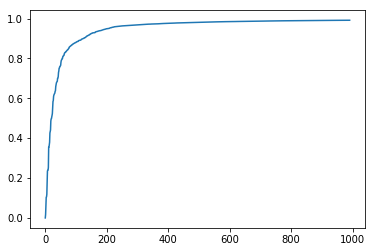

In [306]:
import matplotlib.pyplot as plt
plt.plot((HI_MAX-tmp)/HI_MAX)
plt.show()

In [171]:
w1 = "玩玩"
w2 = "阿公"
# res = model.wv.most_similar(w1,topn = 10)
# for item in res:
#     print(item[0],str(item[1]))
print(model.wv.similarity(w1,w2))
print('是' in hi_freq[:,0])


0.0030169338
True


C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [176]:
import jieba.posseg as pseg
def subject_cut(word):
    words = pseg.cut(word)
    w = []
    f = []
    for word, flag in words:
        w.append(word)
        f.append(flag)
    return w,f

In [100]:
import jieba.posseg as pseg
proN_words = set(['你','我','自己','它'])
misc_words = set([' ','這'])
null_words =  set([' ','的','啦','反而','又','耶','啊','這麼','都','了','才','應該','啦','很','喔','就','再','然後','也',
                  '因為','呀','吧','一下'])
ques_words = set(['是不是','有沒有','嗎','怎麼','如何','何','誰','什麼','哪裡'])
time_words = set(['今天','明天','後天','現在'])
num_words = set(['一','二','兩','三','四','五','六','七','八','九','零'])

#these words are not likely to appear in two consequtive sentences
qfilt = null_words.union(ques_words,proN_words,misc_words)
afilt = null_words.union(null_words)

def get_score(cut_ques,debug = False):
    score = np.zeros([6,])
    lines = cut_ques[0]
    d = set()
    for line in lines:
        for word in line:
            if word not in qfilt:
                d.add(word)
    for i in range(1, 7):
        line = cut_ques[i]
        for a in line:
            for qi,q in enumerate(d):
                if a not in afilt:
                    try:
                        if a==q:
#                             try:
#                                 score[i-1] += ((hi_freq[a]-HI_MAX)/HI_MAX)/2
#                             except:
#                                 score[i-1] += 1;continue
#                             try:
#                                 bonus = (hi_freq[a]-HI_MAX)/HI_MAX
#                             except:pass


                            _,f = subject_cut(a)
                            
                            if(f[0][0] not in  ['N','V','v']):
                                score[i-1] += (0.5**4)
                                continue

        
                        s = np.power(model.wv.similarity(a,q),4)
                        
                        if (a in time_words) and (q in time_words):
                            if a != q:
                                s = -s
                            
                        if s > 0.09 and debug:
                            print(i-1,q,a,s)

                        score[i-1]+= s
                    except:
                        #if dict no included, it could be rare name
                        if a == q:
                            score[i-1]+= 3
    return score
get_score(cut_ques[369],debug = True)


1 大哥 先生 0.21161030148887272
5 真是 真 0.44723558881104913


C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


array([0.02104389, 3.39226981, 0.14669974, 3.12287056, 0.21042614,
       0.59626232])

In [265]:
import jieba.posseg as pseg
best = 0.632
#for each question
ans = np.zeros([500,])
score = np.zeros([500,6])

for q_id,question in enumerate(cut_ques):
    score[q_id,:] = get_score(question)
    ans[q_id] = np.argmax(score[q_id,:])
    
ans = ans.astype(int)
print('done')
a  = (ans==label)
print('accuracy score:',sum(a)/500)
if sum((a)/500)<best:
    print('warning: score drop!')

C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


done
accuracy score: 0.632


In [251]:
from termcolor import colored
score = np.round(score,2)
for i in range(500):
    try:
        if i in hard:
            print(colored('-------------','green'),i,colored('-------------','green'))
        elif i in shit:
            print(colored('-------------','blue'),i,colored('-------------','blue'))
            
        else:
            print('-------------',i,'-------------')
    except:pass
    
    if ans[i]==label[i]:
        pass
#         print(ans[i],label[i],'\t\t',end = '')
#         for si,s in enumerate(score[i,:]):
# #             if si==ans[i]:
# #                 print(colored(s, 'red'),'\t',end = '')
# #             else:
#                 print(s,'\t',end = '')
#         print('v')
    else:
        print(ans[i],label[i],'\t\t',end = '')
        for si,s in enumerate(score[i,:]):
            if si==ans[i]:
                print(colored(s, 'green'),'\t',end = '')
            elif si == label[i]:
                print(colored(s, 'red'),'\t',end = '')
            else:
                print(s,'\t',end = '')
        print()
hard = set([499,494,492,490,486,481,472,471,469,467,466,465,463,460,449,448,442,439,437,435,423,419,417,416,414,
           396,395,394,388])
shit = set([53,423])
#477: 排除"你我"不排除"他"

------------- 0 -------------
------------- 1 -------------
------------- 2 -------------
------------- 3 -------------
------------- 4 -------------
------------- 5 -------------
------------- 6 -------------
0 2 		1.08 	0.18 	0.98 	0.14 	0.3 	0.25 	
------------- 7 -------------
------------- 8 -------------
------------- 9 -------------
------------- 10 -------------
1 3 		0.07 	0.17 	0.0 	0.08 	0.1 	0.06 	
------------- 11 -------------
2 5 		0.88 	0.68 	1.99 	0.97 	0.45 	0.54 	
------------- 12 -------------
------------- 13 -------------
------------- 14 -------------
0 3 		0.62 	0.03 	0.37 	0.07 	0.36 	0.57 	
------------- 15 -------------
------------- 16 -------------
------------- 17 -------------
------------- 18 -------------
------------- 19 -------------
------------- 20 -------------
------------- 21 -------------
------------- 22 -------------
3 0 		1.94 	0.07 	0.31 	3.75 	0.4 	0.51 	
------------- 23 -------------
------------- 24 -------------
0 5 		0.27 	0.02 	0.02 	

2 5 		0.25 	0.56 	1.26 	0.42 	0.73 	0.43 	
------------- 162 -------------
------------- 163 -------------
2 5 		0.03 	0.04 	0.08 	0.03 	0.01 	0.02 	
------------- 164 -------------
5 3 		0.48 	1.57 	0.99 	1.03 	0.2 	1.71 	
------------- 165 -------------
------------- 166 -------------
------------- 167 -------------
------------- 168 -------------
3 1 		0.89 	0.57 	0.74 	0.97 	0.93 	0.9 	
------------- 169 -------------
------------- 170 -------------
------------- 171 -------------
4 3 		1.46 	1.34 	0.48 	0.84 	2.24 	1.27 	
------------- 172 -------------
2 5 		0.09 	0.01 	0.2 	0.01 	0.13 	0.04 	
------------- 173 -------------
------------- 174 -------------
------------- 175 -------------
------------- 176 -------------
------------- 177 -------------
------------- 178 -------------
2 4 		0.18 	0.52 	0.84 	0.37 	0.23 	0.13 	
------------- 179 -------------
------------- 180 -------------
------------- 181 -------------
------------- 182 -------------
------------- 183 ------------

------------- 384 -------------
0 3 		1.0 	0.11 	0.21 	0.71 	0.05 	0.05 	
------------- 385 -------------
------------- 386 -------------
------------- 387 -------------
0 4 		2.03 	1.04 	1.11 	0.26 	1.31 	0.16 	
------------- 388 -------------
------------- 389 -------------
------------- 390 -------------
------------- 391 -------------
------------- 392 -------------
------------- 393 -------------
------------- 394 -------------
2 1 		3.59 	3.42 	3.84 	2.9 	2.57 	2.03 	
------------- 395 -------------
4 5 		0.57 	0.98 	0.4 	0.56 	1.13 	0.56 	
------------- 396 -------------
0 1 		1.72 	0.18 	0.37 	0.22 	0.24 	0.98 	
------------- 397 -------------
------------- 398 -------------
------------- 399 -------------
------------- 400 -------------
------------- 401 -------------
------------- 402 -------------
------------- 403 -------------
0 3 		2.95 	1.24 	0.71 	0.96 	0.74 	0.35 	
------------- 404 -------------
0 2 		0.36 	0.19 	0.09 	0.2 	0.09 	0.08 	
------------- 405 -------------

In [261]:
print(cut_ques[369])

[list([['這裡', '的', '湖水', '風景', '真是', '好', '呀', ' ', '濂', '僑', '大哥'], ['我們', '現在', '所在', '的', '這個', '湖', ' ', '叫做', '什麼', '湖', '啊'], []])
 list(['全部', '的', '人', '都', '到齊', '了', '只', '缺', '主角'])
 list(['他', '就是', '我們', '今天', '的', '主角', '陳志朋', '先生'])
 list(['你', '會', '一點', '點', '手語', '耶'])
 list(['這裡', '是', '桃園縣', '龍潭鄉', '的', '觀光', '大池'])
 list(['待會', '再', '看', '你', '的', '草藥', '啦']) list(['真', '拿', '你', '沒辦法'])]


In [147]:
import jieba
import jieba.posseg as pseg
jieba.set_dictionary('big5_dict.txt')
example_str = '曉書 玫瑰花送給你 是不是很漂亮呢'
cut_example_str = jieba.lcut(example_str)
print(cut_example_str) 
words = jieba.posseg.cut("玫瑰花送給你煮一煮")
for word, flag in words:
    print('%s %s' % (word, flag))

Building prefix dict from C:\Users\a1989\Desktop\DL\Comp1\big5_dict.txt ...
Loading model from cache C:\Users\a1989\AppData\Local\Temp\jieba.u13ee1a1953b639ea7ba618182ba7d2dd.cache
Loading model cost 0.838 seconds.
Prefix dict has been built succesfully.


['曉書', ' ', '玫瑰花', '送給', '你', ' ', '是', '不', '是', '很', '漂亮', '呢']
玫瑰花 N
送給 Vt
你 r
煮 v
一 m
煮 v


In [139]:
import jieba

jieba.set_dictionary('big5_dict.txt')
example_str = '我討厭吃蘋果'
words = pseg.cut(example_str)
print(words[0][0])

TypeError: 'generator' object is not subscriptable

In [112]:
#use for correcting label file
# label[445] = 3
np.save('label.npy',label)
label = np.load('label.npy'); print('label loaded')

label loaded


In [208]:
import jieba.posseg as pseg

def rep_fix(line):
    fix_line = []
#     idx=0
#     while idx+3<=len(line):
#         if len(np.unique(line[idx:idx+3])) == 2:
#             if line[idx] == line[idx+2] and line[idx+1]=='一':
#                 _,f = subject_cut(line[idx])
#                 if(f[0][0] in  ['V','v']):
#                     fix_line.append(line[idx])
#                 idx+=3
#             continue
#         fix_line.append(line[idx])   
#         idx+=1
    i=0
    while i<len(line):
        try:
            if line[i+1]=='一':
                if line[i] == line[i+2]:
                    fix_line.append(line[i])
                    i+=3
                    continue
        except:pass
        fix_line.append(line[i])
        i+=1

    return fix_line

In [180]:
a = [1,2,3]
print(a[:-1])

[1, 2]


In [264]:

stop_words =  set([' ','這','你','我','的','不','是','是不是','啦','嗎','反而','又','有沒有','耶','啊','這麼','都','了'
                  ,'才','自己','應該'])
time_words = set(['今天','明天','後天','現在'])
def get_score(cut_ques,debug = False):
    score = np.zeros([6,])
    lines = cut_ques[0]
    d = set()
    for line in lines:
        for word in line:
            if word not in stop_words:
                d.add(word)
    for i in range(1, 7):
        line = cut_ques[i]
        line = rep_fix(line)
        
        for ai,a in enumerate(line):
#             if a in [' ']:continue
            for q in d:
#                 if w not in stop_words:
                try:
                    s = np.power(model.wv.similarity(a,q),4)

                    if (a in time_words) and (q in time_words):
                        if a != k:
                            s = -s
                    
                    s = min(s,0.7)
                    
                    if s > 0.09 and debug:
                        print(i-1,q,a,np.round(s,3))
                    
                    score[i-1]+= s
                except:
                    #if dict no included, it could be rare name
                    if a == q:
                        score[i-1]+= 3
                        
                    
    return score
get_score(cut_ques[326],debug = True)


0 對 是 0.098
1 要 還要 0.122
1 還要 還要 0.7
4 要 要 0.7
4 還要 要 0.122
4 喔   0.192
5 喔   0.192


C:\Users\a1989\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


array([0.27735242, 1.18002909, 0.19334665, 0.34823947, 1.41188111,
       0.5139542 ])

In [135]:
len(np.unique(['舔','一','舔']))

2

In [94]:
import csv
outname = 'output'+str(np.round(sum(a)/500,3))+'.csv'
with open(outname, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id","Answer"])
    for i,val in enumerate(ans):
        writer.writerow([ i, val])
print(outname)

output0.626.csv


In [263]:
import copy as cp
ans_old = cp.copy(ans)
acc_old =sum(a)/500

In [266]:

acc = np.round(sum(a)/500,3)
print('_'+str(acc_old)+'','__'+str(acc)+'','_','label','_')
for i in range(500):

    if ans_old[i] != ans[i]:
        if i in shit:
            print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>shit<<<',end='')
        print(i,'old',ans_old[i],'cur',ans[i],'label',label[i],end='')
        if(ans_old[i]==label[i]):
            print(' x')
        elif(ans[i]==label[i]):
            print(' o')
        else:print()
        

_0.622 __0.632 _ label _
8 old 1 cur 2 label 2 o
19 old 4 cur 0 label 0 o
23 old 1 cur 0 label 0 o
46 old 3 cur 4 label 1
>>>>>>>>>>>>>>>>>>>>>>>>>>>>shit<<<53 old 1 cur 4 label 1 x
87 old 4 cur 5 label 5 o
145 old 1 cur 4 label 0
149 old 1 cur 2 label 0
239 old 3 cur 0 label 0 o
323 old 4 cur 1 label 1 o
326 old 1 cur 4 label 1 x
378 old 4 cur 5 label 5 o
456 old 2 cur 0 label 2 x
497 old 2 cur 0 label 0 o
